##### Week 18 Homework
###### Angela Spencer  - February 2, 2022

##### 1.	What is a neural network? What are the general steps required to build a neural network? 


Neural networks are a subset of machine learning in which input data is analyzed in a method that recreates the way a human's brain uses neural pathways to process data.  Neural networks take in features and pass the information through a series of non-linearly connected nodes in hidden layers of the network before outputing a predicted value.

Building a neural network:


##### 2.	Generally, how do you check the performance of a neural network? Why? 


Performance of a neural network is evaluated on a validation dataset.  Performance metrics are the same as for lonear/logistic regression: measure of loss for continuous datasets and measure of 

##### 3.	Create a neural network using keras to predict the outcome of either of these datasets: 
    Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
    Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 

import torch
torch.manual_seed(42)

import torch.nn as nn
import torch.nn.functional as F 

In [2]:
# convert .data file to dataframe with column names
col = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
       'viscera_weight', 'shell_weight', 'rings']
abalone = pd.read_csv('../Datasets/abalone.data', names=col)
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#convert 'sex' column to numberic type
print(abalone['sex'].value_counts())

#one hot encode sex values
abalone = pd.concat([abalone, pd.get_dummies(abalone['sex'], prefix='sex')], axis=1)

#drop redundant sex column
abalone.drop('sex', axis=1, inplace=True)

abalone.head()

M    1528
I    1342
F    1307
Name: sex, dtype: int64


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [4]:
#abalone['adult']=abalone['sex_F']+abalone['sex_M']
#abalone['infant']=abalone['sex_I']
#abalone.drop(['sex_F', 'sex_M', 'sex_I', 'whole_weight'], axis=1, inplace=True)

# drop whole weight column, contains redundant information with other columns
# drop infant column as the infant and low number of rings are highly correlated
abalone.drop(['whole_weight'], axis=1, inplace=True)
abalone

,length,diameter,height,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,0.5310,0.2610,0.2960,10,1,0,0


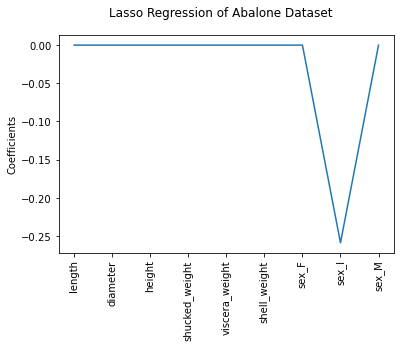

In [5]:
#separate feature and target variables
X = abalone.drop('rings', axis=1)
y = abalone['rings']

lasso = Lasso(alpha=0.6)

lasso_coef = lasso.fit(X,y).coef_
lasso_coef

X_labels = X.columns

n = plt.plot(range(len(X_labels)), lasso_coef)
n = plt.xticks(range(len(X_labels)), X_labels, rotation=90)
n = plt.ylabel('Coefficients')
n = plt.suptitle('Lasso Regression of Abalone Dataset')

plt.show()

In [6]:
input_shape = (len(X.columns),)

def model_func(input_shape=input_shape):
    model = keras.Sequential()
    model.add(layers.Dense(300, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(1))
    return(model)

In [7]:
lr_list = [0.001, 0.01, 0.1]

for lr in lr_list:
    model=model_func()
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mean_squared_error')
    model.fit(X,y, validation_split=0.3)

92/92 [==============================] - 1s 5ms/step - loss: 109.4567 - val_loss: 6.1635


In [8]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model = keras.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(len(X.columns),)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
#model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=adam, loss='mean_squared_error')

early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(X,y, validation_split=0.3, epochs=30, callbacks=[early_stop])


Epoch 1/30
92/92 [==============================] - 1s 9ms/step - loss: 61.4844 - val_loss: 5.9202
Epoch 2/30
92/92 [==============================] - 1s 7ms/step - loss: 6.7817 - val_loss: 4.7915
Epoch 3/30
92/92 [==============================] - 1s 8ms/step - loss: 5.9428 - val_loss: 7.0805
Epoch 4/30
92/92 [==============================] - 1s 8ms/step - loss: 6.5521 - val_loss: 4.7048
Epoch 5/30
92/92 [==============================] - 1s 7ms/step - loss: 5.3573 - val_loss: 4.3666
Epoch 6/30
92/92 [==============================] - 1s 7ms/step - loss: 5.6732 - val_loss: 4.3245
Epoch 7/30
92/92 [==============================] - 1s 7ms/step - loss: 5.5579 - val_loss: 5.8688
Epoch 8/30
92/92 [==============================] - 1s 7ms/step - loss: 6.0414 - val_loss: 4.1656
Epoch 9/30
92/92 [==============================] - 1s 7ms/step - loss: 6.0575 - val_loss: 6.4479
Epoch 10/30
92/92 [==============================] - 1s 7ms/step - loss: 5.7184 - val_loss: 4.2061


In [9]:
## The validation set loss for the Keras model is 4.1589

keras_rmse = np.sqrt(4.1589)
keras_rmse

2.0393381279228806

##### 4.	Write another algorithm to predict the same result as the previous question using either KNN or logistic regression.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#don't forget to scale data
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [11]:
params = {'n_neighbors': np.arange(5, 30, 2)}

k_neighbors = KNeighborsRegressor()

cv = GridSearchCV(k_neighbors, params, cv=5)
cv.fit(X_train_scale, y_train)
cv.best_params_

{'n_neighbors': 17}

In [12]:
knr = KNeighborsRegressor(n_neighbors = 17)
knr.fit(X_train_scale, y_train)
knr_pred = knr.predict(X_test_scale)

knr_rmse = np.sqrt(mean_squared_error(y_test, knr_pred))
knr_rmse

2.204723403214271

##### 5.	Create a neural network using pytorch to predict the same result as question 3. 


In [22]:
X_val = X.values
y_val = y.values

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_val,y_val,test_size=0.3, random_state=42)

X_train_v = torch.FloatTensor(X_train_v)
X_test_v = torch.FloatTensor(X_test_v)

y_train_v = torch.FloatTensor(y_train_v)
y_test_v = torch.FloatTensor(y_test_v)

In [29]:

class ANN_Model(nn.Module):
    
    def __init__(self, input_features=9, hidden1=300, hidden2=300, 
                 hidden3=300, hidden4=300, out_features=1):
        super().__init__()
        self.layer1con = nn.Linear(input_features, hidden1)
        self.layer2con = nn.Linear(hidden1, hidden2)
        self.layer3con = nn.Linear(hidden2, hidden3)
        self.layer4con = nn.Linear(hidden3, hidden4)
        self.out = nn.Linear(hidden4, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer1con(x))
        x = F.relu(self.layer2con(x))
        x = self.out(x)
        return(x)
    
ann = ANN_Model()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)

final_loss = []

for epoch in range(501):
    y_pred = ann.forward(X_train_v)
    loss = loss_function(y_pred, y_train_v)
    final_loss.append(loss)
    
    if epoch % 100 == 0:
        print(f'Epoch number {epoch} with loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number 0 with loss: 112.12271118164062
Epoch number 100 with loss: 10.491743087768555
Epoch number 200 with loss: 10.48863410949707
Epoch number 300 with loss: 10.488067626953125
Epoch number 400 with loss: 10.487728118896484
Epoch number 500 with loss: 10.487476348876953


In [37]:
y_pred_torch = []

with torch.no_grad():
    for i, data in enumerate(X_test_v):
        prediction = ann(data)
        y_pred_torch.append(prediction.argmax())

rmse_torch = np.sqrt(mean_squared_error(y_test_v, y_pred_torch))
rmse_torch

10.320849587323067

##### 6.	Compare the performance of the neural networks to the other model you created. Which performed better? Why do you think that is?